#### by Arturas Aleksandraus 

Hi Vera,

This submission might be a bit different from the others, but I hope you will find it interesting. I'm a very practical person and I like to see and apply theory in practice. I do that by building things. So instead of writing a long essay, I build functions. This helps me to understand the theory better and also to apply it in practice. I hade a lot of fun building these functions and I hope you will find my way acceptable.

If you have any questions, please let me know.

If you want to run the code your self you can find it here: 

https://github.com/Arty-Facts/wasp_graphical_models_bayesian_learning_and_statistical_relational_learning_2023/blob/main/project/module3/hand_in_module3.ipynb



In [21]:
import numpy as np
from itertools import product, combinations, combinations_with_replacement, permutations
from collections import defaultdict
from tqdm import tqdm

#### (Inductive logic programming in the context of prop ositional logic) Le p,q,r be propositional variables (6p)

Since i find it intreating to apply theory to parties i will try to implement the algorithm in python. My argument for that is that if i can implement it then i probably understand it. I will reason for the answers that the algorithm gives.

#### Assignment 1

(a) Suppose that all the formulas ¬p ∨ r, ¬q ∨ ¬r and p are true. Determine the
truth values of q and r.

In [22]:
true_statements = [
    lambda p, q, r: not p or r,
    lambda p, q, r: not q or not r,
    lambda p, q, r: p,
]

# way not try all possible combinations?
for p, q, r in product([True, False], repeat=3):
    if all(map(lambda f: f(p, q, r), true_statements)):
        print(f"p={p}, q={q}, r={r}")


p=True, q=False, r=True


* if p is true then r must be true given true statement ¬p ∨ r.
* if r is true then q must be false given true statement ¬q ∨ ¬r.

#### Answer 1.a
q is false and r is true.

(b) Construct a CNF φ which avoids N and covers E where:

    N = {(0,1,0),(1,0,0),(1,1,0)} and

    E = {(0,0,0),(0,0,1),(0,1,1),(1,0,1),(1,1,1)}.
    
    Try to simplify φ as much as p ossible by removing unnecessary 1 literals (if such
    exist).

In [23]:
E = np.array([(0,0,0),(0,0,1),(0,1,1),(1,0,1),(1,1,1)])
N = np.array([(0,1,0),(1,0,0),(1,1,0)])
def covers(cause, statements):
    """
    all positive examples satisfy φ
    """
    cause = np.array(cause, dtype=bool)
    covered = np.zeros(len(statements), dtype=bool)
    for i, statement in enumerate(statements):
        res = list(map(lambda c, s: c if s  else not c, cause, statement))
        covered[i] = any(res)
    return all(covered)

def avoids(cause, statements):
    """
    no negative example satisfy φ
    """
    cause = np.array(cause, dtype=bool)
    avoided = np.zeros(len(statements), dtype=bool)
    for i, statement in enumerate(statements):
        res = list(map(lambda c, s: c if s  else not c, cause, statement))
        avoided[i] = all(res)
    return not any(avoided)

def cause_str(cause):
    cause, idxs = cause
    return '(' + ' ∨ '.join(map(lambda i: f'{L[i]}' if cause[i] else f'¬{L[i]}', idxs)) + ')'

L = ['p', 'q', 'r', 's', 't']

def find_H(cause, E, N, maximal=True):
    for cause_size in  sorted(range(1, len(E[0])+1), reverse=maximal):
        for idxs in combinations(range(len(E[0])), cause_size):
            curr_cause = [cause[i] for i in idxs]
            if covers(curr_cause, statements=E[:, idxs]) and avoids(curr_cause, statements=N[:, idxs]):
                return cause, idxs
    return None, None

def algorithm(E, N, maximal=True):
    """
    Algorithm 1; producing a maximally general set or simplified set of clauses H which covers E and avoids N
    (3.3) in Logic_and_probability_7.pdf
    """
    inxs = []
    H = []
    used = set()
    for cause in N:
        cause = [int(not c) for c in cause]
        cause, idxs = find_H(cause, E, N, maximal)
        if cause is not None:
            curr = tuple([cause[i] for i in idxs] + list(idxs))
            if curr in used:
                continue
            used.add(curr)
            H.append(cause)
            inxs.append(idxs)
    return zip(H, inxs)

Fi = algorithm(E, N, maximal=True)
print('Maximally CNF:')
print(' ∧ '.join(map(cause_str, Fi)))

Fi = algorithm(E, N, maximal=False)
print('Simplified CNF:')
print(' ∧ '.join(map(cause_str, Fi)))

Maximally CNF:
(p ∨ ¬q ∨ r) ∧ (¬p ∨ q ∨ r) ∧ (¬p ∨ ¬q ∨ r)
Simplified CNF:
(¬q ∨ r) ∧ (¬p ∨ r)


#### Answer 1.b  
Algorithm 1/2; producing a maximally general set or simplified set of clauses H which covers E and avoids N. (3.3) in Logic_and_probability_7.pdf


1. φ with Maximally CNF: 

    (p ∨ ¬q ∨ r) ∧ (¬p ∨ q ∨ r) ∧ (¬p ∨ ¬q ∨ r)

2. φ with Simplified CNF: 

    (¬q ∨ r) ∧ (¬p ∨ r)


##### In the rest of the assignments L and M refer to the language L and L-structure M that we now define. 

Let L = {P,Q,R,S,T} where the relation symbols P,Q,R,S,T have arities 1,1,2,2,2, respectively.

Let M b e the L-structure with domain M = {1,2,3,...,20} and the following interpretations of the relation symbols:
* PM = {1,2,3,4,5,6,7,8,9,10},
* QM = {1,2,3,4,5,11,12,13,14,15},
* RM = {(i,j) : i ̸= j,1 ≤i ≤5 and 1 ≤j ≤5},
* SM = {(2,5),(3,1),(4,3),(1,2),(5,4),(2,3),(4,2),(1,3),(3,5),(4,5)},
* TM = {(2,5),(3,1),(4,3),(1,2),(5,4),(3,2),(2,1),(1,4),(2,4),(5,2)}.

In [24]:
# lets define a base class to work with. it needs to have a name and arity
class Base:
    name = None
    arity = None
    def __repr__(self) -> str:
        return self.name + '(' + ','.join(map(str, self.args)) + ')'
    def __eq__(self, value: object) -> bool:
        return value.name == self.name and value.args == self.args
    def __hash__(self) -> int:
        return hash(self.name) + hash(self.args)

class Target:
    def __init__(self, name, arg, pos=0):
        self.name = name
        self.arg = arg
        self.pos = pos
    def __repr__(self) -> str:
        return f'{self.name}'
    def __eq__(self, value: object) -> bool:
        return str(value) == str(self)
    def __hash__(self) -> int:
        return hash(self.name + str(self.arg) + str(self.pos))
    
class P(Base):
    name = "P"
    arity = 1
    def __init__(self, *args):
        self.args = args
        assert len(args) == self.arity
    
class Q(Base):
    name = "Q"
    arity = 1
    def __init__(self, *args):
        self.args = args
        assert len(args) == self.arity

class R(Base):
    name = "R"
    arity = 2
    def __init__(self, *args):
        self.args = args
        assert len(args) == self.arity

class S(Base):
    name = "S"
    arity = 2
    def __init__(self, *args):
        self.args = args
        assert len(args) == self.arity

class T(Base):
    name = "T"
    arity = 2
    def __init__(self, *args):
        self.args = args
        assert len(args) == self.arity
        
M = set(range(1,21))
PM = set(map(P, [1,2,3,4,5,6,7,8,9,10]))
QM = set(map(Q, [1,2,3,4,5,11,12,13,14,15]))
RM = {R(i,j) for i in range(1,6) for j in range(1,6) if i != j}
SM = set(map(S, [2,3,4,1,5,2,4,1,3,4], [5,1,3,2,4,3,2,3,5,5]))
TM = set(map(T, [2,3,4,1,5,3,2,1,2,5], [5,1,3,2,4,2,1,4,4,2]))

#### Inductive logic programming and concept learning

* Would in it be fun to implement the algorithm that helps us to learn concepts? Yes!
* Can we use example in the in Logic_and_probability_7.pdf to guide and validate our implementation? Yes!
* Is it harder then just solving the assignments by hand? Yes!
* Is solving the assignments by hand a good idea? Probably Yes!
* Will we implement the algorithm even though it is harder and christmas is coming close? Yes!

Thank your patience. Lets get started!

PS. I will try to add some comments to the code to make it more readable. Don't skip them pls.

In [25]:
def valid_combs(arity, variables):
    return filter(lambda x: len(set(x)) == len(x), product(range(variables), repeat=arity))
    
# how do we learn a concept?
# lets iterate over all possible concepts!
def concept_learning(statement, domain, relations, structures, extra_variables=0, concept_size=2):
    # we need to find a concept that is true and false for all relation examples
    result = defaultdict(set)
    # We need to find a concept that has at least the same amount of variables as the arity as the statement
    variables = statement.arity
    # lets iterate over all possible concepts of size concept_size
    for structs in tqdm(list(combinations_with_replacement(structures, concept_size))):
        init_var_stat = list(range(variables))
        # lets build and abstract target string
        target_str = str(statement(*[f"x{j}" for j in init_var_stat]))

        # lets iterate possible initializations of the concept
        for init_var_concept in product(*[valid_combs(s.arity, variables+extra_variables) for s in list(structs)]):
            # if the concept has less variables than the target statement the skip it
            if not all(map(lambda x: x in [i for row in init_var_concept for i in row], init_var_stat)):
                continue

            # lets iterate over all possible truth values
            for truths in product([lambda x: x, lambda x: not x], repeat=len(structs)):
                # lets build and abstract concept string
                truths_str = ["¬" if t(False) else "" for t in truths]
                concept_str = ' ∧ '.join(sorted(set([t+str(s(*[f"x{i}" for i in v])) for t, s, v in zip(truths_str, structs, init_var_concept)])))

                for d in filter(lambda x: len(set(x)) == len(x), product(domain, repeat=variables)):
                    # lets initialize the statement
                    stat = statement(*[d[j] for j in init_var_stat])
                    # lets check if the statement is true or false for all relations
                    target_stat = stat in relations[stat.name]
        
                    # if we have extra variables we need to iterate over them as well
                    for e in product([dom for dom in domain if dom not in d], repeat=extra_variables):
                        cd = d + e
                        # lets initialize the concept
                        concept = [s(*[cd[j] for j in v]) for s, v in zip(structs, init_var_concept)]
                        # lets check if the concept is true or false for all relations
                        condition_concept = [ t(r) for r, t in zip(map(lambda x: x in relations[x.name], concept), truths) ]
                        # lets save the result
                        result[(concept_str, target_str, e)].add((all(condition_concept), target_stat))

    # we are know have a dictionary with all possible concepts and their truth values
    return result

# how do we read what concepts we have learned?
def parse_result(result):
    concepts_eq = set()
    concepts_imp = set()
    # lets iterate over all concepts
    for (c, t, e), examples in result.items():
        # lets check if c implies t and t implies c since thats the same as c <-> t
        if not any(map(lambda x: x[0] and not x[1], examples)) and not any(map(lambda x: not x[0] and x[1], examples)):
            concepts_eq.add(f"{c} <-> {t}")
        elif not any(map(lambda x: x[0] and not x[1], examples)): # c -> t
            concepts_imp.add(f"{c} -> {t}")
  
    # WOW! we have learned some concepts
    return concepts_eq, concepts_imp



#### Lets start by solving the assignments in the Logic_and_probability_7.pdf (3.4.1) 

In [26]:
# python lacks a scope so we need to define a function to not pollute the global namespace
def scope():
    class F(Base):
        arity = 1
        name = "F"
        def __init__(self, *args):
            self.args = args
            assert len(args) == F.arity
        
    class P(Base):
        arity = 2
        name = "P"
        def __init__(self, *args):
            self.args = args
            assert len(args) == P.arity

    class D(Base):
        arity = 2
        name = "D"
        def __init__(self, *args):
            self.args = args
            assert len(args) == D.arity

    class G(Base):
        arity = 2
        name = "G"
        def __init__(self, *args):
            self.args = args
            assert len(args) == G.arity

    A = ['a', 'b', 'e', 'g', 'h', 'm', 'n', 't']

    relations = {'F': {F('m'), F('h'), F('e'), F('n')}, # (i.e. m,n,e, and n are females),
                'P': {P('g', 'm'), P('h', 'm'), P('h', 't'), P('t', 'e'), P('n', 'e'), P('a', 't'), P('e', 'b')}, # (i.e. g is a parent of m, h is a parent of m, and so on)
                'D': {D('m', 'g'), D('m', 'h'), D('e', 't'), D('e', 'n')}, # (i.e. m is a daughter of g)
                'G': {G('h', 'e'), G('n', 'b')}, # (i.e. h is a grandmother of e, n is a grandmother of b)
    }

    result = concept_learning(D, A, relations, [F, P, G], extra_variables=0, concept_size=2)
    concepts_eq, concepts_imp = parse_result(result)
    print('Concepts: Daughters')

    for c in concepts_eq:
        print(c)

    result = concept_learning(G, A, relations, [F, P, D], extra_variables=1, concept_size=3)
    concepts_eq, concepts_imp = parse_result(result)
    print('Concepts: Grandmothers')

    for c in concepts_eq:
        print(c)
scope()

100%|██████████| 6/6 [00:00<00:00, 352.79it/s]


Concepts: Daughters
F(x0) ∧ P(x1,x0) <-> D(x0,x1)


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

Concepts: Grandmothers
F(x0) ∧ P(x0,x2) ∧ P(x2,x1) <-> G(x0,x1)
D(x2,x0) ∧ F(x0) ∧ P(x2,x1) <-> G(x0,x1)


Result:

We found the following concept for Daughters:
1. F(x1) ∧ P(x0,x1) <-> D(x0,x1)

This makes sense witch is good!

We found the following concept for Grandmothers:

1. F(x0) ∧ P(x2,x1) ∧ P(x0,x2) <-> G(x0,x1)
2. F(x0) ∧ P(x2,x1) ∧ D(x2,x0) <-> G(x0,x1)

That is cool since we found one that was expected and one that was not expected but makes sense.

Ether we are a grandmother to the child of our child or that our mother is a grandmother to our child. 


#### Assignment 2

Learning the concept R(x,y): Find literals θ1(x,y),...,θn(x,y) which do not contain R and such that M |= ∀x∀y((θ1(x,y)∧...∧θn(x,y)) → R(x,y)) and M|= ∃x∃y(θ1(x,y)∧...∧θn(x,y)). Observe that a literal denoted θk(x,y) above need not necessarily contain both variables x and y and it may be of the form x = y or ¬(x = y).
There may be several possibilities, but to get maximal credit on this assignment you
need to find such θ1(x,y),...,θn(x,y) so that 

$$
M|= ∀x∀y((θ1(x,y) ∧... ∧θn(x,y)) ↔ R(x,y))
$$

In [27]:
relations = {'P': PM, 'Q': QM, 'R': RM, 'S': SM, 'T': TM}

result = concept_learning(R, M, relations, [P, Q, S, T], extra_variables=0, concept_size=4)
concepts_eq, concepts_imp = parse_result(result)
print('Concepts: R')
for c in concepts_eq:
    print(c)


100%|██████████| 35/35 [00:14<00:00,  2.41it/s]

Concepts: R
P(x0) ∧ P(x1) ∧ Q(x0) ∧ Q(x1) <-> R(x0,x1)


#### Answer 2

Concept a that is learned for R is:
$$
P(x0) ∧ P(x1) ∧ Q(x0) ∧ Q(x1) ↔ R(x0,x1) 
$$

After a solution its easy to see that this is a correct solution. However there might exist other solutions that has a larger set of literals. However the smallest set of literals that gives the correct solution is 4 literals.


#### Construction of a probabilistic model and inference

As previously lets use the course material to guide the implementation and validation of the algorithm.
Its imt to travel to the land of chapter 5 in Logic_and_probability_7.pdf   

Algorithm1 for finding the arrows of a DAG corresponding to a lifted Bayesian network:
```
Set k := 1 and as long as k < m do:
    For every i = 1,...,k, add an arrow from φi to φk+1.
    Set I := {1,...,k}.
    For i = 1,...,k do:
        If φk+1 and φi are conditionally independent over (φj : j ∈I \{i}), then 
            remove i from I (i.e. set I := I \{i}) and remove the arrow from φi to φk+1. 
        Otherwise
            do nothing.
    Set k := k + 1.
Next, for every vertex φk with parents φi1,...,φis , say, one computes the conditional probability
μ^{n}(φk = 1 | φi1 = b1,...,φis = bs) for every choice of b1,...,bs ∈{0,1}.
```



In [28]:
import networkx as nx
import matplotlib.pyplot as plt
from fractions import Fraction

In [29]:
def intersect(obj, relations, phi):
    offset = 0
    if isinstance(phi, Target):
        offset = phi.pos
    res = set()
    for o in obj:
        for r in relations:
            if r.args == o[offset:r.arity+offset]:
                res.add(o)
    return res

def left_join(obj, relations, phi):
    offset = 0
    if isinstance(phi, Target):
        offset = phi.pos
    res = obj.copy()
    for o in obj:
        for r in relations:
            if r.args == o[offset:r.arity+offset]:
                res.discard(o)
    return res

def full(M, arity):
    return set(product(M, repeat=arity))
def full_uniq(M, arity):
    return set(filter(lambda x: len(set(x)) == len(x), product(M, repeat=arity)))

class BayesianNetwork:
    def __init__(self, nodes, M, relations, arity):
        self.nodes = nodes
        self.edges = []
        self.M = M
        self.relations = relations
        self.arity = arity
        self.parents = defaultdict(set)
        self.children = defaultdict(set)

    def add_edge(self, node1, node2):
        self.edges.append((node1, node2))
        self.parents[node2].add(node1)
        self.children[node1].add(node2)
    
    def remove_edge(self, node1, node2):
        self.edges.remove((node1, node2))
        self.parents[node2].remove(node1)
        self.children[node1].remove(node2)

    def draw(self):
        G = nx.DiGraph()
        G.add_nodes_from([f'{n.name}({n.arg})' if isinstance(n, Target) else f'{n}' for n in self.nodes])
        for arrow in self.edges:
            a1 = arrow[0]
            a2 = arrow[1]
            if isinstance(a1, Target):
                a1 = f'{a1.name}({a1.arg})'
            if isinstance(a2, Target):
                a2 = f'{a2.name}({a2.arg})'
            G.add_edge(a1, a2)
        nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", font_size=14)
    
    def table(self):
        # lets build a table using BFS
        used = set()
        frontier = list(filter(lambda x: len(self.parents[x]) == 0, self.nodes))
        print('Conditional probabilities:')
        while len(frontier) > 0:
            node = frontier.pop(0)
            if node in used:
                continue
            used.add(node)
            parents = self.parents[node]
            # lets compute the conditional probability based on the parents
            for op in product([True, False], repeat=len(parents)):
                repr = [] # lets build a representation of the conditional probability
                value = 0
                full_set = full_uniq(self.M, self.arity) # make sure that x /= y
                for n, p in zip(parents, op):
                    if p:
                        if isinstance(n, Target):
                            repr.append(f'{n}({n.arg})')
                        else:
                            repr.append(f'{n}')
                        # if its true we need to get the intersection if the sets
                        full_set = intersect(full_set, self.relations[str(n)], n)
                    else:
                        if isinstance(n, Target):
                            repr.append(f'¬{n}({n.arg})')
                        else:
                            repr.append(f'¬{n}')
                        # if its false we need to get the left join of the sets
                        full_set = left_join(full_set, self.relations[str(n)], n)
                p_str = ''
                if len(repr) > 0:
                    p_str = ' | '+' ∧ '.join(repr)

                node_str = f'{node}'
                if isinstance(node, Target):
                    node_str = f'{node}({node.arg})'
                # if the set is empty then its undefined
                if len(full_set) == 0:
                    print(f'μ({node_str}{p_str}) = undefined')
                else:
                    # lets count conditional probability
                    known = intersect(full_set, self.relations[str(node)], node)
                    value = len(known)/len(full_set)
                    # lts print the conditional probability as a fraction :) 
                    print(f'μ({node_str}{p_str}) = { Fraction(value).limit_denominator(100)}')
                    # print(known)
                    # print(full_set)
                
            print('-'*20)
            # dont forget you children
            for child in self.children[node]:
                frontier.append(child)
        

def build_lifted_network(M, phi, relations, arity=1):
    # lets build a network
    network = BayesianNetwork(phi, M, relations, arity)
    # lets make sure that the relations are in the correct order
    rel = [relations[str(n)] for n in phi]
    
    # following the algorithm in 5.1
    for k in range(len(phi)-1):
        for i in range(0, k+1):
            network.add_edge(phi[i], phi[k+1])
        I = set(range(k+1))
        for i in range(k+1):
            if is_conditionally_independent(rel, phi, k+1, I, i, M, arity):
                I.remove(i)
                network.remove_edge(phi[i], phi[k+1])
    return network


def is_conditionally_independent(relations, phi, k, I, i, M, arity):
    # lets copy the k relation
    k_set = relations[k].copy()
    dependents = []
    for op in product([True, False], repeat=len(I)):
        # lets build the full possible set
        full_set = full(M, arity)
        # lets se what left after evaluating the conjunction
        for j, p in zip(I, op):
            if p:
                # if its true we need to get the intersection if the sets 
                full_set = intersect(full_set, relations[j], phi[j])
            else:
                # if its false we need to get the left join of the sets
                full_set = left_join(full_set, relations[j], phi[j])
        # if the set is empty then we cant do anything
        if len(full_set) == 0:
            dependents.append(False)
            continue
        # lets count conditional probability
        full_val = len(intersect(full_set, k_set, phi[k]))/len(full_set)
        # lets build the subset that excludes i
        sub_set = full(M, arity)
        for j, p in zip(I-{i}, op):
            if p:
                # if its true we need to get the intersection if the sets
                sub_set = intersect(sub_set, relations[j], phi[j])
            else:
                # if its false we need to get the left join of the sets
                sub_set = left_join(sub_set, relations[j], phi[j])
        # if the set is empty then we cant do anything
        if len(sub_set) == 0:
            dependents.append(False)
            continue
        # lets count conditional probability
        sub_val = len(intersect(sub_set, k_set, phi[k]))/len(sub_set)
        # lets check if the conditional probability is the same
        dependents.append(full_val == sub_val)
    return all(dependents)




In [30]:
class I1(Base):
    arity = 1
    name = "I1"
    def __init__(self, *args):
        self.args = args
        assert len(args) == I1.arity
class I2(Base):
    arity = 1
    name = "I2"
    def __init__(self, *args):
        self.args = args
        assert len(args) == I2.arity

class I3(Base):
    arity = 1
    name = "I3"
    def __init__(self, *args):
        self.args = args
        assert len(args) == I3.arity

M2 = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'}
I1M = {I1('A'), I1('D'), I1('F'), I1('G'), I1('J'), I1('L')}
I2M = {I2('B'), I2('D'), I2('G'), I2('I'), I2('J'), I2('L')}
I3M = {I3('A'), I3('C'), I3('D'), I3('F'), I3('G'), I3('I'), I3('K'), I3('J'), I3('L')}

Conditional probabilities:
μ(I1(x)) = 1/2
--------------------
μ(I2(x) | I1(x)) = 2/3
μ(I2(x) | ¬I1(x)) = 1/3
--------------------
μ(I3(x) | I1(x)) = 1
μ(I3(x) | ¬I1(x)) = 1/2
--------------------


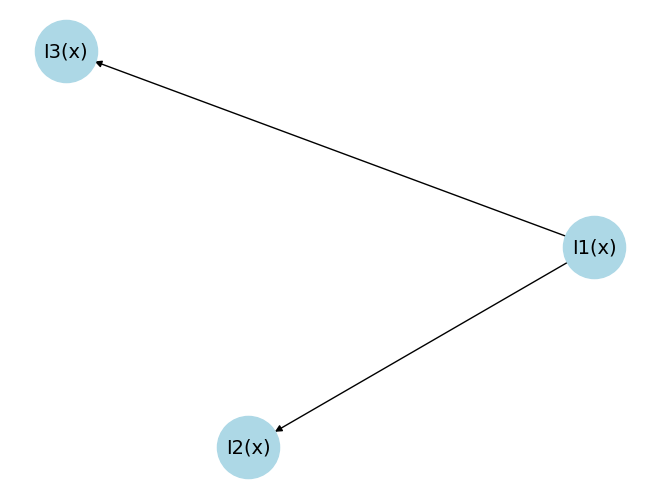

In [31]:
relations2 = {'I1(x)': I1M, 
             'I2(x)': I2M,
             'I3(x)': I3M,
}
phi = ['I1(x)', 'I2(x)', 'I3(x)']

bayesian_network = build_lifted_network(M2, phi, relations2)
bayesian_network.table()
bayesian_network.draw()
plt.show()

Conditional probabilities:
μ(I3(x)) = 3/4
--------------------
μ(I1(x) | I3(x)) = 2/3
μ(I1(x) | ¬I3(x)) = 0
--------------------
μ(I2(x) | I1(x) ∧ I3(x)) = 2/3
μ(I2(x) | I1(x) ∧ ¬I3(x)) = undefined
μ(I2(x) | ¬I1(x) ∧ I3(x)) = 1/3
μ(I2(x) | ¬I1(x) ∧ ¬I3(x)) = 1/3
--------------------


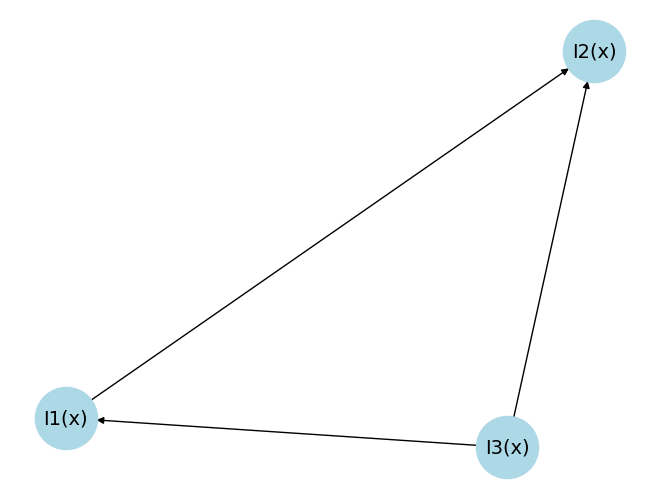

In [32]:
phi = ['I3(x)', 'I1(x)', 'I2(x)', ]

bayesian_network = build_lifted_network(M2, phi, relations2)
bayesian_network.table()
bayesian_network.draw()
plt.show()

Conditional probabilities:
μ(BIG(x)) = 3/8
--------------------
μ(BIG(y)) = 3/8
--------------------
μ(DIRECT(x,y) | BIG(x) ∧ BIG(y)) = 2/3
μ(DIRECT(x,y) | BIG(x) ∧ ¬BIG(y)) = 1/3
μ(DIRECT(x,y) | ¬BIG(x) ∧ BIG(y)) = 1/3
μ(DIRECT(x,y) | ¬BIG(x) ∧ ¬BIG(y)) = 1/10
--------------------


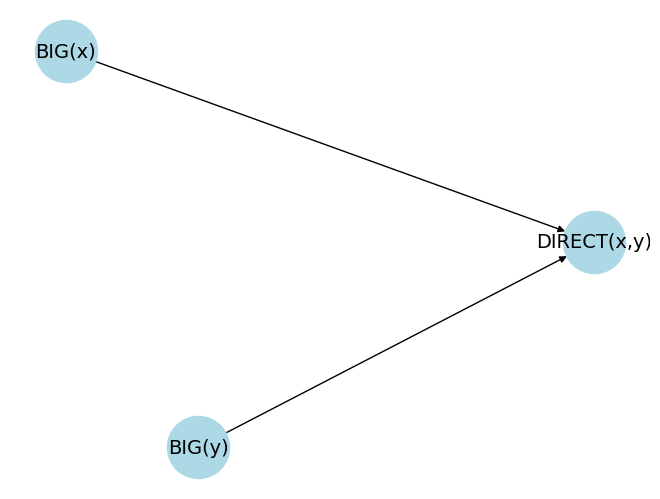

In [33]:
class Big(Base):
    arity = 1
    name = "BIG"
    def __init__(self, *args):
        self.args = args
        assert len(args) == Big.arity

class Direct(Base):
    arity = 2
    name = "DIRECT"
    def __init__(self, *args):
        self.args = args
        assert len(args) == Direct.arity


M3 = {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'}
BigM = {Big('A'),Big('E'),Big('H')}
DirectM = {Direct('A', 'B'), 
           Direct('B', 'A'), 
           Direct('A', 'H'), 
           Direct('H', 'A'), 
           Direct('B', 'C'), 
           Direct('C', 'B'), 
           Direct('B', 'E'), 
           Direct('E', 'B'), 
           Direct('E', 'D'), 
           Direct('D', 'E'), 
           Direct('E', 'F'), 
           Direct('F', 'E'), 
           Direct('E', 'H'), 
           Direct('H', 'E'), 
           Direct('H', 'G'), 
           Direct('G', 'H'),
           }

relations3 = {'BIG': BigM, 
              'DIRECT': DirectM,
}
phi = [Target('BIG', 'x', 0),Target('BIG', 'y', 1), Target('DIRECT', 'x,y')]

bayesian_network = build_lifted_network(M3, phi, relations3, arity=2)
bayesian_network.table()
bayesian_network.draw()

After evaluating the algorithm on the textbook example i feel confident that it has somewhat reasonable chance of working. Let continue with the assignment 3.

#### Assignment 3
(Learning a Bayesian network) Construct a Bayesian network from M in the way explained in Chapter 5.1 using the following order of the formulas, also viewed as random variables from $M^{2}$ to {0,1}: $P(x), P(y), Q(x), Q(y), R(x,y), S(x,y), T(x,y)$. As explained in Chapter 4, we can identify P(x) with a random variable $P_x: $M^{2}$ → {0,1} such that $P_x(a,b)$ = 1 if M |= P(a) and $P_x(a,b)$ = 0 otherwise. P(y) can be identified with a random variable $P_y: $M^{2}$ → {0,1} such that $P_y(a,b)$ = 1 if M |= P(b) and $P_y(a,b)$ = 0 otherwise. If you need you can use conditions like 'x = y' or 'x ̸= y' when specifying conditions for conditional probabilities (although we don't view such formulas as vertices of the network).

It is also possible, and acceptable, to construct a lifted Bayesian network with vertices $P,Q,R,S,T$ (considered in this order) as defined in Definition 6.2.1 in my notes. The procedure will b e essentially the same and you have to do the same calculations. The resulting lifted Bayesian network will b e similar to the one obtained by the first approach, but not identical since the later has 5 vertices while the first has 7. (In the later approach $P(x)$ and $P(y)$ are identified, and $Q(x)$ and $Q(y)$ are identified.) When determining (conditional) independence you can use the usual mathematical definition of independence, as there is no need for "approximation" in this assignment. Use the counting measure (i.e. uniform probability distribution) μ : M → R when determining (conditional) probabilities.

Conditional probabilities:
μ(P(x)) = 1/2
--------------------
μ(P(y)) = 1/2
--------------------
μ(Q(x)) = 1/2
--------------------
μ(Q(y)) = 1/2
--------------------
μ(S(x,y) | P(x) ∧ Q(y) ∧ Q(x) ∧ R(x,y) ∧ P(y)) = 1/2
μ(S(x,y) | P(x) ∧ Q(y) ∧ Q(x) ∧ R(x,y) ∧ ¬P(y)) = undefined
μ(S(x,y) | P(x) ∧ Q(y) ∧ Q(x) ∧ ¬R(x,y) ∧ P(y)) = undefined
μ(S(x,y) | P(x) ∧ Q(y) ∧ Q(x) ∧ ¬R(x,y) ∧ ¬P(y)) = 0
μ(S(x,y) | P(x) ∧ Q(y) ∧ ¬Q(x) ∧ R(x,y) ∧ P(y)) = undefined
μ(S(x,y) | P(x) ∧ Q(y) ∧ ¬Q(x) ∧ R(x,y) ∧ ¬P(y)) = undefined
μ(S(x,y) | P(x) ∧ Q(y) ∧ ¬Q(x) ∧ ¬R(x,y) ∧ P(y)) = 0
μ(S(x,y) | P(x) ∧ Q(y) ∧ ¬Q(x) ∧ ¬R(x,y) ∧ ¬P(y)) = 0
μ(S(x,y) | P(x) ∧ ¬Q(y) ∧ Q(x) ∧ R(x,y) ∧ P(y)) = undefined
μ(S(x,y) | P(x) ∧ ¬Q(y) ∧ Q(x) ∧ R(x,y) ∧ ¬P(y)) = undefined
μ(S(x,y) | P(x) ∧ ¬Q(y) ∧ Q(x) ∧ ¬R(x,y) ∧ P(y)) = 0
μ(S(x,y) | P(x) ∧ ¬Q(y) ∧ Q(x) ∧ ¬R(x,y) ∧ ¬P(y)) = 0
μ(S(x,y) | P(x) ∧ ¬Q(y) ∧ ¬Q(x) ∧ R(x,y) ∧ P(y)) = undefined
μ(S(x,y) | P(x) ∧ ¬Q(y) ∧ ¬Q(x) ∧ R(x,y) ∧ ¬P(y)) = undefined
μ(S(x,y) | P(x) ∧ ¬Q(y) ∧ ¬Q

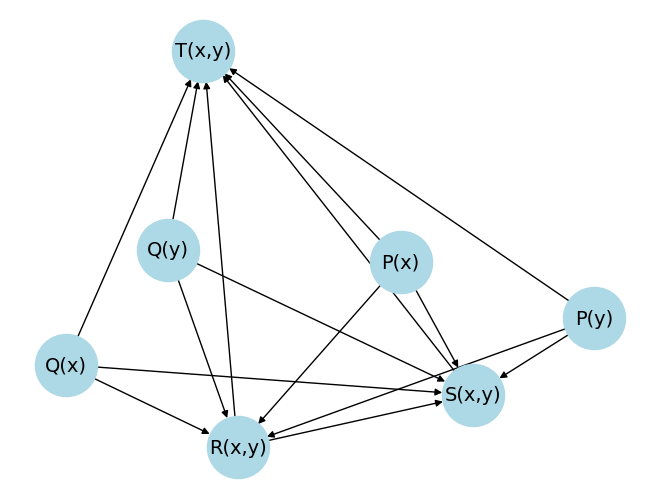

In [34]:
phi = [
    Target('P','x'), 
    Target('P', 'y', 1), 
    Target('Q', 'x'), 
    Target('Q', 'y', 1), 
    Target('R', 'x,y'),
    Target('S', 'x,y'),
    Target('T', 'x,y'),
]
basian_network = build_lifted_network(M, phi, relations, arity=2)
basian_network.table()
basian_network.draw()
plt.show()

#### Answer 3

This was a massive Basian Network. However it make sense, from the previous assignment we learn concept $P(x0) ∧ P(x1) ∧ Q(x0) ∧ Q(x1) <-> R(x0,x1)$ this is present in the network and it confirms the equivalence of the concept since the conditional probability of $μ(R(x,y) | Q(y) ∧ P(x) ∧ P(y) ∧ Q(x))$ is 1.

Following up on the rest $R(x,y), S(x,y), T(x,y)$ we can se that there is a lot of state overlap in the data and that the dependency are arbitrary and are mostly dependent on the algorithm and the order that we used to construct the network.


#### Incomplete Data

Lets start at figure 5.7 in Logic_and_probability_7.pdf and see if we can implement the EM algorithm. 



In [35]:
def EM_algorithm(data, p0, iterations=10):
    # lets initialize the parameters
    p = p0
    number_of_variables = len(data)
    truth = len(list(filter(lambda x: x, data)))
    unk = len(list(filter(lambda x: x is None, data)))
    none_truth = len(list(filter(lambda x: not x and x is not None, data)))
    assert truth + unk + none_truth == number_of_variables, f'{truth} + {unk} + {none_truth} != {number_of_variables}'
    results = [p]
    # lets iterate
    for i in range(iterations):
        # lets compute the expected values
        p = (truth + unk*p)/(number_of_variables)
        results.append(p)
    return results

def compute_likelihood(data):
    truth = len(list(filter(lambda x: x, data)))
    none_truth = len(list(filter(lambda x: not x and x is not None, data)))
    return truth/(truth+none_truth)


In [36]:
customer = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
# This is a copy of the table in the figure 5.7 in Logic_and_probability_7.pdf where None is unknown
I1C = [True, False, None, True, False, True, True, False, False, None, False, True]
I2C = [False, True, False, True, False, False, True, False, True, True, False, True]
I3C = [True, False, True, True, False, True, None, False, True, True, True, True]

print('μ(I1(x))')
data = I1C
p0 = 0.1
res = EM_algorithm(data, p0, iterations=6)
print('EM algorithm:')
print(' -> '.join(map(lambda x: f'{x:.4f}', res)))

print(f'Computed Likelihood:\n{compute_likelihood(data):.4f}')

μ(I1(x))
EM algorithm:
0.1000 -> 0.4333 -> 0.4889 -> 0.4981 -> 0.4997 -> 0.4999 -> 0.5000
Computed Likelihood:
0.5000


In [37]:
print('μ(I3(x))')
data = I3C
p0 = 0.1
res = EM_algorithm(data, p0, iterations=5)
print('EM algorithm:')
print(' -> '.join(map(lambda x: f'{x:.4f}', res)))

print(f'Computed Likelihood:\n{compute_likelihood(data):.4f}')

μ(I3(x))
EM algorithm:
0.1000 -> 0.6750 -> 0.7229 -> 0.7269 -> 0.7272 -> 0.7273
Computed Likelihood:
0.7273


In [38]:
data = list(map(lambda x: all(x),  filter(lambda x: not None in x,  zip(I3C, I1C))))
p0 = 1
i3_i1 = compute_likelihood(data)
i1 = compute_likelihood(I1C)

print(f'μ(I3(x) | I1(x)) = μ(I3(x) ∧ I1(x)) / μ(I1(x)) = ({Fraction(i3_i1).limit_denominator(100)})/({Fraction(i1).limit_denominator(100)}) = {Fraction(i3_i1/i1).limit_denominator(100)}')


μ(I3(x) | I1(x)) = μ(I3(x) ∧ I1(x)) / μ(I1(x)) = (4/9)/(1/2) = 8/9


We can se that the iterative algorithm converges fast. However it is faster to just use the closed form solution.

Lets apply it to the data in the assignment.



#### Assignment 4
Now assume that for each of the pairs (1,4),(5,10),(14,6) and (3,5) we do not know if it belongs to RM or not, and for each of the pairs (4,3),(1,3) and (6,8) we do not know if it belongs to SM or not, but otherwise all assumptions are as before.

Estimate μ(R(x,y)) (also denoted μ(R = 1)) and μ(S(x,y) | R(x,y)) (also denoted μ(S = 1 | R = 1)) by the methods described in Chapter 5.3.

In [39]:
print("Estimate μ(R(x,y))")
all_r = {n: False for n in full_uniq(M, 2)}
all_r.update({n.args: True for n in relations['R']}) # Set the True values
all_r.update({n: None for n in [(1,4),(5,10),(14,6),(3,5)]}) # Set the unknown values

res = EM_algorithm(list(all_r.values()), 0.5, iterations=5)
print('EM algorithm:')
print(' -> '.join(map(lambda x: f'{x:.4f}', res)))

print(f'Computed Likelihood:\n{compute_likelihood(list(all_r.values())):.4f}')


Estimate μ(R(x,y))
EM algorithm:
0.5000 -> 0.0526 -> 0.0479 -> 0.0479 -> 0.0479 -> 0.0479
Computed Likelihood:
0.0479


In [40]:
print("Estimate μ(S(x,y) | R(x,y))")
all_s = {n: False for n in full_uniq(M, 2)}
all_s.update({n.args: True for n in relations['S']}) # Set the True values
all_s.update({n: None for n in [(4,3),(1,3),(6,8)]}) # Set the unknown values

s_r = compute_likelihood(list(map(lambda x: all(x),  filter(lambda x: not None in x,  zip(all_s.values(), all_r.values())))))
r = compute_likelihood(list(all_r.values()))
print(f'μ(S(x,y) | R(x,y)) = μ(S(x,y) ∧ R(x,y)) / μ(R(x,y)) = ({Fraction(s_r).limit_denominator(100)})/({Fraction(r).limit_denominator(100)}) = {s_r/r:.4f}')



Estimate μ(S(x,y) | R(x,y))
μ(S(x,y) | R(x,y)) = μ(S(x,y) ∧ R(x,y)) / μ(R(x,y)) = (1/53)/(1/21) = 0.3920


#### Answer 4

Estimating $μ(R(x,y))$ with 5 iteration of EM algorithm with p0 of 0.5 gives us the following result:

0.5000 -> 0.0526 -> 0.0479 -> 0.0479 -> 0.0479 -> 0.0479


Computed the likelihood gives us 0.0479

we can se that we have converged to the same result after 2 iterations.

Estimating $μ(S(x,y) | R(x,y))$ we rewrite the formula to $\frac{μ(S(x,y) ∧ R(x,y))}{μ(R(x,y))}$ and we get the following result:

$μ(S(x,y) | R(x,y)) = \frac{μ(S(x,y) ∧ R(x,y))}{μ(R(x,y))} \approx  \frac{1/53}{1/21}  \approx 0.3920$

You have to excuse me for the fraction approximation. I did not want to calculate the fraction by hand.  

#### Assignment 5

(Inference/prediction) Let G denote the Bayesian network constructed in assignment 3. Let Dn= {1,...,n} be a domain. Let Wn be the set of all L-structures with domain Dn. For each positive integer n, the Bayesian network G determines a probability distribution Pn on Wn in the way explained by examples in sections 4.2.9, 5.2.1 and 5.2.2. (If one uses the approach in Chapter 6 then Definition 6.2.5 tells how G determines a probability distribution on Wn. However, it is important to understand what that definition means in the case of the concrete Bayesian network obtained in assignment 3.) Material on the slides from the lectures may also be of help to understand how one can reason about the distribution Pn on Wn.

Since we are interested in results for large n you can choose some lower bound to n
if you need it.

(a) Suppose that a,b ∈ Dn and a ̸= b. Let Pn(R(a,b)) b e an abbreviation of Pn({A ∈ Wn: A |= R(a,b)}), and similarly for S in place of R. Determine Pn(R(a,b)) and Pn(S(a,b)) and show how you get to your conclusions.

(b) For any first-order sentence φ let Pn(φ) b e an abbreviation of Pn({A ∈ Wn: A |= φ}). Determine limn→∞Pn (∀x∃y∃z(S(x,y) ∧¬S(x,z)))and show how you get your conclusion


#### Answer 5a

I must be honest with you. I did not understand the topic for this assignment, however i will try to answer it to the best of my ability. But it fells like i am missing some crucial understanding of the topic. Lets not give up! Lets try to solve it!

Determining $Pn(R(a,b))$ given $G$ and $a,b ∈ Dn$ and $a \ne b$ conditional probabilities, R(x,y) is influenced by P(x), P(y), Q(x), and Q(y). We can calculate Pn(R(a,b)) using these influences. Since $μ(R(x,y)∣ P(y) ∧ Q(x) ∧ P(x) ∧ Q(y)) = 1$, and other conditions lead to $μ(R(x,y)∣…) = 0$, we only need to consider the scenario where all influencing variables are True.

Since $μ(P(x))=μ(P(y))=μ(Q(x))=μ(Q(y))=1/2$, the probability of all these being true simultaneously is $\frac{1}{2^4} = \frac{1}{16}$. Therefore, $Pn(R(a,b))=\frac{1}{16}$.


Determining $Pn(S(a,b))$ given $G$ and $a,b ∈ Dn$ and $a \ne b$ conditional probabilities, S(x,y) is influenced by P(x), P(y), Q(x), Q(y) and R(x,y). We have the following probabilities from the conditional probability tables (CPTs):

$μ(P(x) = 1)=μ(P(y) = 1)=μ(Q(x) = 1)=μ(Q(y) = 1)=1/2$ 

$μ(R(x,y) = 1)=1/16$

The exist one valid scenario where S(x,y) is true and that is when $R(x,y) = 1$ and $μ(S(x,y)∣ R(x,y)) = 1/2$. Therefore, $Pn(S(a,b))=\frac{1}{16}*\frac{1}{2} = \frac{1}{32}$. 


#### Answer 5b

To be honest im not sure how to start this one. Hopefully i will not need the points from this assignment to pass the course. But if I have to understand this i will allot more material to work with it. This feel a bit to fluffy for me. :(